Obligatorio: Inteligencia Artificial Generativa.
Proyecto: Animals with attributes CVAE

Leandro Cardoso - 166267
Felipe Schramm - 343028
Martin Rizzo - 343631

In [ ]:
!pip install torchinfo

In [ ]:
!unzip /content/elefante_frente.zip

Archive:  /content/elefante_frente.zip
   creating: elefante_frente/
  inflating: elefante_frente/elephant_10003.jpg  
  inflating: elefante_frente/elephant_10018.jpg  
  inflating: elefante_frente/elephant_10035.jpg  
  inflating: elefante_frente/elephant_10042.jpg  
  inflating: elefante_frente/elephant_10051.jpg  
  inflating: elefante_frente/elephant_10057.jpg  
  inflating: elefante_frente/elephant_10068.jpg  
  inflating: elefante_frente/elephant_10078.jpg  
  inflating: elefante_frente/elephant_10085.jpg  
  inflating: elefante_frente/elephant_10096.jpg  
  inflating: elefante_frente/elephant_10098.jpg  
  inflating: elefante_frente/elephant_10101.jpg  
  inflating: elefante_frente/elephant_10104.jpg  
  inflating: elefante_frente/elephant_10111.jpg  
  inflating: elefante_frente/elephant_10123.jpg  
  inflating: elefante_frente/elephant_10124.jpg  
  inflating: elefante_frente/elephant_10136.jpg  
  inflating: elefante_frente/elephant_10175.jpg  
  inflating: elefante_frente/el

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from torchinfo import summary

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
)

import shutil
from collections import Counter
import pandas as pd
import os
import kagglehub
from PIL import Image

import torchvision.transforms.functional as F
import numpy as np
import random
import math
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# **Descargamos más imagenes de elefantes.**

In [ ]:
path = kagglehub.dataset_download("rrebirrth/animals-with-attributes-2")
path = kagglehub.dataset_download("vivmankar/asian-vs-african-elephant-image-classification")

100%|██████████| 13.0G/13.0G [01:47<00:00, 129MB/s]

Extracting files...


100%|██████████| 51.8M/51.8M [00:00<00:00, 72.7MB/s]

Extracting files...


In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/"

# **Movemos las imagenes al mismo source**

In [ ]:
source_paths = [
    "/root/.cache/kagglehub/datasets/vivmankar/asian-vs-african-elephant-image-classification/versions/1/dataset/test/African",
    "/root/.cache/kagglehub/datasets/vivmankar/asian-vs-african-elephant-image-classification/versions/1/dataset/test/Asian",
    "/root/.cache/kagglehub/datasets/vivmankar/asian-vs-african-elephant-image-classification/versions/1/dataset/train/African",
    "/root/.cache/kagglehub/datasets/vivmankar/asian-vs-african-elephant-image-classification/versions/1/dataset/train/Asian"
]

# Ruta de destino
destination_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/elephant"

# Crear el directorio de destino si no existe
os.makedirs(destination_path, exist_ok=True)

# Mover archivos
for source in source_paths:
    for filename in os.listdir(source):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filtrar imágenes
            source_file = os.path.join(source, filename)
            prefix = os.path.basename(os.path.dirname(source))  # Nombre de la carpeta padre como prefijo
            destination_file = os.path.join(destination_path, f"{prefix}_{filename}")

            counter = 1
            while os.path.exists(destination_file):
                destination_file = os.path.join(destination_path, f"{prefix}_{counter}_{filename}")
                counter += 1

            shutil.move(source_file, destination_file)

print("¡Transferencia completada!")


¡Transferencia completada!


In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.colheader_justify", "left")

**SELECCIONAMOS EL ANIMAL Y CLASE QUE IREMOS A UTILIZAR PARA NUESTROS TESTS**

In [ ]:
labels_path = os.path.join(dataset_path, "classes.txt")  # Cambiar según el archivo disponible
classes = pd.read_csv(labels_path, header=None)  # Configurar header según el formato del archivo
print("Clases en el dataset:")
print(classes.loc[18])

attr_path = os.path.join(dataset_path, "predicates.txt")
features = pd.read_csv(attr_path, header=None)
print("\nAtributos de las clases:")
print(features.loc[4])

Clases en el dataset:
0        19\telephant
Name: 18, dtype: object

Atributos de las clases:
0         5\tgray
Name: 4, dtype: object


In [ ]:
# Define las rutas de origen y destino!
source_dir = '/content/elefante_frente'
destination_dir = '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/elefante_frente'

# Asegúrate de que el directorio de destino exista
os.makedirs(os.path.dirname(destination_dir), exist_ok=True)

# Copiar la carpeta y su contenido
shutil.copytree(source_dir, destination_dir)



'/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/elefante_frente'

In [ ]:
import shutil
import os
from tqdm import tqdm

# Definir las rutas de origen y destino
source_dir = '/content/elefante_frente'
destination_dir = '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/elephant'

# Borrar el contenido de la carpeta de destino si existe
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)

# Crear la carpeta de destino nuevamente
os.makedirs(destination_dir, exist_ok=True)

# Copiar el contenido de la carpeta de origen a la carpeta de destino con tqdm para el progreso
for item in tqdm(os.listdir(source_dir), desc="Copiando archivos", unit="archivo"):
    src_path = os.path.join(source_dir, item)
    dst_path = os.path.join(destination_dir, item)

    # Copiar archivo o carpeta
    if os.path.isdir(src_path):
        shutil.copytree(src_path, dst_path)
    else:
        shutil.copy2(src_path, dst_path)

print("Contenido copiado exitosamente.")


Copiando archivos: 100%|██████████| 205/205 [00:00<00:00, 1880.71archivo/s]

Contenido copiado exitosamente.


In [ ]:
import os
from collections import Counter

# Ruta al dataset
dataset_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages"

# Contar imágenes por clase
def count_images_by_class(dataset_path):
    class_counts = {}

    for class_folder in os.listdir(dataset_path):  # Iterar sobre las carpetas de clases
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):  # Verificar que sea una carpeta
            # Contar archivos de imagen en la carpeta
            num_images = len([file for file in os.listdir(class_path) if file.lower().endswith(('png', 'jpg', 'jpeg'))])
            class_counts[class_folder] = num_images

    return class_counts

# Obtener el conteo de imágenes
image_counts = count_images_by_class(dataset_path)

# Mostrar el resultado
for class_name, count in image_counts.items():
    print(f"Clase '{class_name}': {count} imágenes")

Clase 'mole': 100 imágenes
Clase 'wolf': 589 imágenes
Clase 'collie': 1028 imágenes
Clase 'mouse': 185 imágenes
Clase 'persian+cat': 747 imágenes
Clase 'horse': 1645 imágenes
Clase 'bat': 383 imágenes
Clase 'siamese+cat': 500 imágenes
Clase 'walrus': 215 imágenes
Clase 'rat': 310 imágenes
Clase 'bobcat': 630 imágenes
Clase 'hippopotamus': 684 imágenes
Clase 'grizzly+bear': 852 imágenes
Clase 'tiger': 877 imágenes
Clase 'blue+whale': 174 imágenes
Clase 'dalmatian': 549 imágenes
Clase 'beaver': 193 imágenes
Clase 'chimpanzee': 728 imágenes
Clase 'leopard': 720 imágenes
Clase 'rabbit': 1088 imágenes
Clase 'squirrel': 1200 imágenes
Clase 'humpback+whale': 709 imágenes
Clase 'skunk': 188 imágenes
Clase 'buffalo': 895 imágenes
Clase 'seal': 988 imágenes
Clase 'elephant': 205 imágenes
Clase 'weasel': 272 imágenes
Clase 'raccoon': 512 imágenes
Clase 'moose': 704 imágenes
Clase 'cow': 1338 imágenes
Clase 'dolphin': 946 imágenes
Clase 'chihuahua': 567 imágenes
Clase 'sheep': 1420 imágenes
Clase 

In [ ]:
def show_images(images, labels, title="Animals Dataset"):
    n = len(images)
    rows = math.floor(math.sqrt(n))
    columns = math.ceil(n / rows)
    fig, axs = plt.subplots(rows, columns, figsize=(12, 8))
    fig.suptitle(title, fontsize=14, y=0.95)
    for i in range(rows):
        for j in range(columns):
            index = i * columns + j
            if index < n:
                axs[i, j].imshow(images[index])
                axs[i, j].set_title(labels[index], fontsize=10)
                axs[i, j].axis('off')
            else:
                axs[i, j].axis('off')
                plt.tight_layout(rect=[0, 0, 1, 0.95])
                plt.show()

def load_classes(classes_file):
    classes = {}
    with open(classes_file, 'r') as f:
        for line in f:
            class_id, class_name = line.strip().split()
            classes[int(class_id)] = class_name
    return classes

def load_attributes(predicates_file):
    attributes = {}
    with open(predicates_file, 'r') as f:
        for line in f:
            attribute_id, attribute_name = line.strip().split()
            attributes[int(attribute_id)] = attribute_name
    return attributes

def filter_predicate_matrix(predicate_matrix_file, selected_classes, selected_attributes, classes_dict, attributes_dict):
    predicate_matrix = np.loadtxt(predicate_matrix_file, dtype=int)

    class_indices = [k for k, v in classes_dict.items() if v in selected_classes]
    attribute_indices = [k for k, v in attributes_dict.items() if v in selected_attributes]

    filtered_matrix = predicate_matrix[np.ix_(class_indices, attribute_indices)]

    filtered_classes = {k: classes_dict[k] for k in class_indices}
    filtered_attributes = {k: attributes_dict[k] for k in attribute_indices}

    return filtered_matrix, filtered_classes, filtered_attributes

def load_filtered_data(predicate_matrix_file, selected_classes, selected_attributes, classes_dict, attributes_dict):
    predicate_matrix = np.loadtxt(predicate_matrix_file, dtype=int)
    class_indices = [k-1 for k, v in classes_dict.items() if v in selected_classes]
    attribute_indices = [k-1 for k, v in attributes_dict.items() if v in selected_attributes]
    filtered_matrix = predicate_matrix[np.ix_(class_indices, attribute_indices)]
    filtered_classes = {k: classes_dict[k] for k in (np.array(class_indices)+1)}
    filtered_attributes = {k: attributes_dict[k] for k in (np.array(attribute_indices)+1)}
    return filtered_matrix, filtered_classes, filtered_attributes

def reindex_classes_and_attributes(filtered_classes, filtered_attributes):

    new_class_indices = {old_idx: new_idx for new_idx, old_idx in enumerate(filtered_classes.keys())}
    new_attribute_indices = {old_idx: new_idx for new_idx, old_idx in enumerate(filtered_attributes.keys())}
    return new_class_indices, new_attribute_indices

def is_valid_image(img_path, filtered_class_names):
    return any(class_name in img_path for class_name in filtered_class_names)

def show_varied_images(dataloader, filtered_classes, filtered_attributes, num_images=8):
    """
    Muestra imágenes del DataLoader con sus clases y atributos, seleccionando ejemplos variados.
    """
    # Obtener un lote del DataLoader
    all_images, all_attributes, all_classes = [], [], []

    # Iterar sobre varios lotes para recolectar datos
    for images, classes, attributes in dataloader:
        all_images.extend(images)
        all_attributes.extend(attributes)
        all_classes.extend(classes)
        if len(all_images) >= 100:  # Recolectar un número suficiente de ejemplos
            break
    new_class_indices, new_attribute_indices = reindex_classes_and_attributes(filtered_classes, filtered_attributes)
    reindexed_attributes = {new_idx: name for old_idx, new_idx in new_attribute_indices.items() for k, name in filtered_attributes.items() if k == old_idx}
    print(reindexed_attributes)
    for images, classes, attributes in dataloader:
        print("Clases en el lote:", [filtered_classes[c.item()] for c in classes])
        #print("Atributos en el lote:", attributes)
        print("Atributos en el lote:", [
            [reindexed_attributes[a] for a, val in enumerate(attr) if val == 1]
            for attr in attributes
        ])
        break
    # Convertir atributos y clases a nombres
    class_names = list(filtered_classes.values())
    attribute_names = list(filtered_attributes.values())

    # Seleccionar ejemplos variados aleatoriamente
    selected_indices = random.sample(range(len(all_images)), num_images)

    plt.figure(figsize=(15, 5))
    for idx, i in enumerate(selected_indices):
        img = all_images[i]
        attrs = [attribute_names[j] for j, val in enumerate(all_attributes[i]) if val == 1]
        cls = filtered_classes[all_classes[i].item()]

        # Deshacer normalización para visualizar correctamente
        img = img.permute(1, 2, 0).numpy()  # De [C, H, W] a [H, W, C]
        img = (img * 0.5 + 0.5).clip(0, 1)  # Revertir normalización (-1, 1) a (0, 1)

        plt.subplot(1, num_images, idx + 1)
        plt.imshow((img * 255).astype("uint8"))
        plt.axis('off')
        plt.title(f"{cls}\n" + (", ".join(attrs) if attrs else "No attributes"))

    plt.tight_layout()
    plt.show()

def generate_cvae_images(model, attr_value, num_samples=5, device='cuda'):
    model.eval()
    with torch.no_grad():
        # Prepare attribute tensor
        attr = torch.tensor([[attr_value]]).float().to(device)
        attr = attr.repeat(num_samples, 1)

        # Generate images
        samples = model.sample(num_samples, attr)

        # Plot results
        plt.figure(figsize=(12, 3))
        for i, img in enumerate(samples):
            img = img.permute(1, 2, 0).cpu().numpy()
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

def generate_cvae2_images(model, attr_value, num_samples=5, device='cuda'):
    model.eval()
    with torch.no_grad():
        # Prepare attribute tensor
        if isinstance(attr_value, (int, float)):
            attr = torch.full((1, model.attr_dim), float(attr_value), device=device)
        elif isinstance(attr_value, list):
            attr = torch.tensor([attr_value], device=device)
        elif isinstance(attr_value, torch.Tensor):
            attr = attr_value.to(device)
            if attr.dim() == 1:
                attr = attr.unsqueeze(0)
        else:
            raise ValueError("attr_value debe ser un int, list o tensor")

        attr = attr.repeat(num_samples, 1)

        z = torch.randn(num_samples, model.latent_dim, device=device)
        samples = model.decode(z, attr)

        plt.figure(figsize=(12, 3))
        for i, img in enumerate(samples):
            img = img.permute(1, 2, 0).cpu().numpy()
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

def generate_vae_images(model, num_samples=5, device='cuda'):
    model.eval()
    with torch.no_grad():
        # Sample from normal distribution
        z = torch.randn(num_samples, model.z_dim).to(device)

        # Generate images
        generated_images = model.decode(z)

        # Plot results
        plt.figure(figsize=(12, 3))
        for i, img in enumerate(generated_images):
            img = img.permute(1, 2, 0).cpu().numpy()
            img = (img + 1) / 2.0  # Convert from [-1,1] to [0,1] range due to tanh
            img = np.clip(img, 0, 1)

            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.axis('off')

        plt.tight_layout()
        plt.show()


**TRANSFORMACIONES**

In [ ]:
DEVICE = "cpu"
if torch.cuda.is_available():
    DEVICE = "cuda"
elif torch.backends.mps.is_available():
    DEVICE = "mps"

print(f"Usando {DEVICE}")

NUM_WORKERS = 3
BATCH_SIZE = 8

Usando cuda


In [ ]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
])

**DATASET CLASS**

In [ ]:
class AnimalAttributesDataset(Dataset):
    def __init__(self, root, transform, filtered_classes, filtered_matrix):
        self.root = root
        self.transform = transform
        self.samples = []
        self.filtered_matrix = filtered_matrix

        class_to_new_idx = {orig_idx: new_idx for new_idx, orig_idx in enumerate(filtered_classes)}

        for class_idx, class_name in enumerate(filtered_classes):
            class_dir = os.path.join(root, classes_dict[class_name])
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(class_dir, img_name)
                        self.samples.append((img_path, class_name, self.filtered_matrix[class_idx]))


    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        img_path, img_class, attributes = self.samples[index]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        attributes = torch.tensor(attributes, dtype=torch.float32)
        image_class = torch.tensor(img_class, dtype=torch.int32)
        return image, image_class, attributes

In [ ]:
classes_file = labels_path
predicates_file = attr_path
predicate_matrix_file = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/predicate-matrix-binary.txt"

classes_dict = load_classes(classes_file)
attributes_dict = load_attributes(predicates_file)
print("Classes dict: ", classes_dict)

selected_classes = ["elephant"]  # Nombres de las especies
selected_attributes = ["gray"]  # Nombres de atributos

filtered_matrix, filtered_classes, filtered_attributes = load_filtered_data(
    predicate_matrix_file, selected_classes, selected_attributes, classes_dict, attributes_dict
)

print("Clases seleccionadas:", filtered_classes)
print("Atributos seleccionados:", filtered_attributes)
print("Matriz filtrada:\n", filtered_matrix)

new_class_indices, new_attribute_indices = reindex_classes_and_attributes(filtered_classes, filtered_attributes)

print("Nuevos índices para clases:", new_class_indices)
print("Nuevos índices para atributos:", new_attribute_indices)
print()

print("Clases seleccionadas (reindexadas):", {new_idx: name for old_idx, new_idx in new_class_indices.items() for k, name in filtered_classes.items() if k == old_idx})
print("Atributos seleccionados (reindexados):", {new_idx: name for old_idx, new_idx in new_attribute_indices.items() for k, name in filtered_attributes.items() if k == old_idx})
print("Matriz filtrada:\n", filtered_matrix)

Classes dict:  {1: 'antelope', 2: 'grizzly+bear', 3: 'killer+whale', 4: 'beaver', 5: 'dalmatian', 6: 'persian+cat', 7: 'horse', 8: 'german+shepherd', 9: 'blue+whale', 10: 'siamese+cat', 11: 'skunk', 12: 'mole', 13: 'tiger', 14: 'hippopotamus', 15: 'leopard', 16: 'moose', 17: 'spider+monkey', 18: 'humpback+whale', 19: 'elephant', 20: 'gorilla', 21: 'ox', 22: 'fox', 23: 'sheep', 24: 'seal', 25: 'chimpanzee', 26: 'hamster', 27: 'squirrel', 28: 'rhinoceros', 29: 'rabbit', 30: 'bat', 31: 'giraffe', 32: 'wolf', 33: 'chihuahua', 34: 'rat', 35: 'weasel', 36: 'otter', 37: 'buffalo', 38: 'zebra', 39: 'giant+panda', 40: 'deer', 41: 'bobcat', 42: 'pig', 43: 'lion', 44: 'mouse', 45: 'polar+bear', 46: 'collie', 47: 'walrus', 48: 'raccoon', 49: 'cow', 50: 'dolphin'}
Clases seleccionadas: {19: 'elephant'}
Atributos seleccionados: {5: 'gray'}
Matriz filtrada:
 [[1]]
Nuevos índices para clases: {19: 0}
Nuevos índices para atributos: {5: 0}

Clases seleccionadas (reindexadas): {0: 'elephant'}
Atributos s

In [ ]:
# Ruta al dataset
images_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages"

selected_classes = ["elephant"]  # Nombres de las especies
selected_attributes = ["gray"]  # Nombres de atributos
# Cargar clases y atributos
classes_dict = load_classes(classes_file)
attributes_dict = load_attributes(predicates_file)

# Filtrar clases y atributos
filtered_matrix, filtered_classes, filtered_attributes = load_filtered_data(
    predicate_matrix_file, selected_classes, selected_attributes, classes_dict, attributes_dict
)

# Crear dataset y dataloader
dataset = AnimalAttributesDataset(
    root=images_path,
    transform=transform,
    filtered_classes=filtered_classes,
    filtered_matrix=filtered_matrix
)
if len(dataset) > 0:
    dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
else:
    print("El dataset está vacío. Verifica tus datos de entrada.")

for images, images_classes, attributes in dataloader:
    print("CONTENIDO DEL DATALOADER")
    print(f"Batch de imágenes: {images.size()}, \nBatch de especies: {images_classes.size()}, \nBatch de atributos: {attributes.size()}")
    break

CONTENIDO DEL DATALOADER
Batch de imágenes: torch.Size([8, 3, 64, 64]), 
Batch de especies: torch.Size([8]), 
Batch de atributos: torch.Size([8, 1])


In [ ]:
print(f"Tipo de filtered_matrix: {type(filtered_matrix)}")
print(f"Contenido: {filtered_matrix}")
print(f"Tamaño: {len(filtered_matrix) if hasattr(filtered_matrix, '__len__') else 'N/A'}")

Tipo de filtered_matrix: <class 'numpy.ndarray'>
Contenido: [[1]]
Tamaño: 1


{0: 'gray'}
Clases en el lote: ['elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant', 'elephant']
Atributos en el lote: [['gray'], ['gray'], ['gray'], ['gray'], ['gray'], ['gray'], ['gray'], ['gray']]


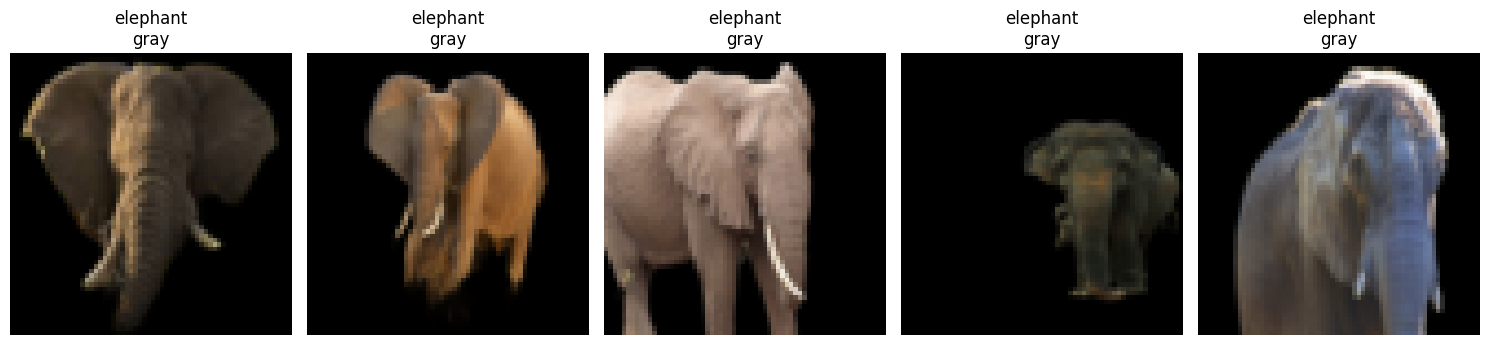

In [ ]:
show_varied_images(dataloader, filtered_classes, filtered_attributes, num_images=5)

**Loss function**

In [ ]:
import torch.nn.functional as F
def loss_function(x, x_hat, mean, log_var):
    reconstruction_loss = F.mse_loss(x_hat, x, reduction='sum')

    # KL divergence entre la distribución latente y la distribución estándar normal
    kl_divergence = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

**Train models**

In [ ]:
def train_cvae_model(model, dataloader, optimizer, epochs=10, device='cuda'):
    model = model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        n_batches = 0

        for images, batches, attributes in dataloader:
            images = images.to(device)
            batches = batches.to(device)
            attributes = attributes.to(device)

            optimizer.zero_grad()
            recon_images, mu, log_var = model(images, attributes)
            loss = loss_function(recon_images, images, mu, log_var)

            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            n_batches += 1

        avg_loss = total_loss / n_batches
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


def train_vae_model(model, dataloader, optimizer, num_epochs=10, device='cuda'):

    model = model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch_idx, (images, _, _) in enumerate(dataloader):
            images = images.to(device)

            optimizer.zero_grad()

            recon_batch, mu, logvar = model(images)

            loss = loss_function(recon_batch, images, mu, logvar)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            if batch_idx % 100 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, Loss: {loss.item()/len(images):.4f}')

        avg_loss = total_loss / len(dataloader.dataset)
        print(f'====> Epoch {epoch+1}: Average loss = {avg_loss:.4f}')

***MODELOS***

**UNO: CVAE**

In [ ]:
class ConditionalVAE(nn.Module):
    def __init__(self, img_channels, img_size, num_hidden, num_classes):
        super().__init__()
        self.img_size = img_size
        self.num_hidden = num_hidden

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(img_channels, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * (img_size // 4)**2, num_hidden),
        )
        self.mu = nn.Linear(num_hidden, num_hidden)
        self.log_var = nn.Linear(num_hidden, num_hidden)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(num_hidden + num_classes, 64 * (img_size // 4)**2),
            nn.ReLU(),
            nn.Unflatten(1, (64, img_size // 4, img_size // 4)),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, img_channels, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, y):
        if y.dim() == 1:
            y = F.one_hot(y, num_classes=self.decoder[0].in_features - self.num_hidden).float()
        encoded = self.encoder(x)
        mu = self.mu(encoded)
        log_var = self.log_var(encoded)
        z = self.reparameterize(mu, log_var)
        z_cond = torch.cat([z, y], dim=1)
        decoded = self.decoder(z_cond)
        return decoded, mu, log_var

    def sample(self, num_samples, y):
        with torch.no_grad():
            z = torch.randn(num_samples, self.num_hidden).to(y.device)
            y_expanded = y.expand(num_samples, -1)
            z_cond = torch.cat([z, y_expanded], dim=1)
            samples = self.decoder(z_cond)
        return samples

**Model Summary**

In [ ]:
dummy_images = torch.randn(8, 3, 64, 64)  # [B, C, H, W]
dummy_attrs = torch.randn(8, 1)  # [B, attr_dim]

# Instancia el modelo
model = ConditionalVAE(img_channels=3, img_size=64, num_hidden=512, num_classes=1)

# Usa torchinfo.summary con input_data
summary(
    model,
    input_data=(dummy_images,dummy_attrs),
)

Layer (type:depth-idx)                   Output Shape              Param #
ConditionalVAE                           [8, 3, 64, 64]            --
├─Sequential: 1-1                        [8, 512]                  --
│    └─Conv2d: 2-1                       [8, 32, 32, 32]           1,568
│    └─ReLU: 2-2                         [8, 32, 32, 32]           --
│    └─Conv2d: 2-3                       [8, 64, 16, 16]           32,832
│    └─ReLU: 2-4                         [8, 64, 16, 16]           --
│    └─Flatten: 2-5                      [8, 16384]                --
│    └─Linear: 2-6                       [8, 512]                  8,389,120
├─Linear: 1-2                            [8, 512]                  262,656
├─Linear: 1-3                            [8, 512]                  262,656
├─Sequential: 1-4                        [8, 3, 64, 64]            --
│    └─Linear: 2-7                       [8, 16384]                8,421,376
│    └─ReLU: 2-8                         [8, 16384]   

**Train Model**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

lr = 1e-4
img_size = 64
num_hidden = 512
num_classes = 1

epochs = 30

In [ ]:
model = ConditionalVAE(img_channels=3, img_size=img_size, num_hidden=num_hidden, num_classes=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_cvae_model(model, dataloader, optimizer, epochs, device)

Epoch 1, Loss: 146832.4766
Epoch 2, Loss: 95861.8286
Epoch 3, Loss: 76845.8041
Epoch 4, Loss: 73482.3430
Epoch 5, Loss: 72045.2357
Epoch 6, Loss: 71220.5158
Epoch 7, Loss: 70647.0663
Epoch 8, Loss: 70287.5666
Epoch 9, Loss: 69975.4196
Epoch 10, Loss: 69751.5793
Epoch 11, Loss: 69588.6082
Epoch 12, Loss: 69423.9467
Epoch 13, Loss: 69338.8651
Epoch 14, Loss: 69227.3845
Epoch 15, Loss: 69121.9055
Epoch 16, Loss: 69054.3018
Epoch 17, Loss: 69000.8184
Epoch 18, Loss: 68953.3607
Epoch 19, Loss: 68914.9983
Epoch 20, Loss: 68861.8487
Epoch 21, Loss: 68815.4465
Epoch 22, Loss: 68778.9715
Epoch 23, Loss: 68746.8733
Epoch 24, Loss: 68716.4943
Epoch 25, Loss: 68693.6618
Epoch 26, Loss: 68663.3269
Epoch 27, Loss: 68649.1480
Epoch 28, Loss: 68619.3553
Epoch 29, Loss: 68603.7816
Epoch 30, Loss: 68593.5491


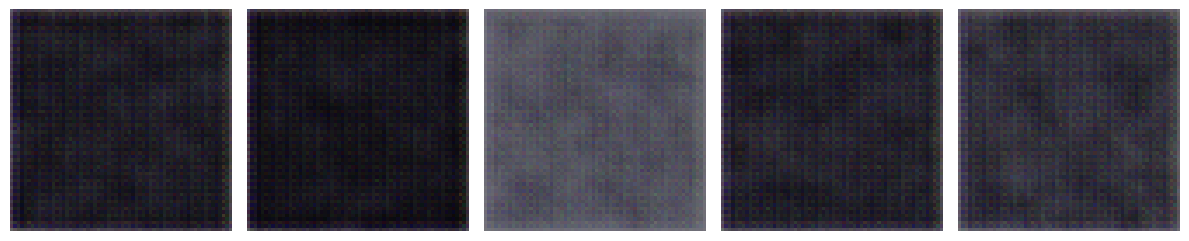

In [ ]:
generate_cvae_images(model, attr_value=1.0, num_samples=5)

**DOS: CVAE w/improvments: conv2d + dropout + batchnorm**

In [ ]:
class CVAE(nn.Module):
    def __init__(self, image_size, latent_dim, attr_dim, dropout_prob=0.3):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.attr_dim = attr_dim
        self.image_size = image_size
        self.dropout_prob = dropout_prob

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # [B, 32, H/2, W/2]
            nn.LeakyReLU(negative_slope=0.2),
            nn.BatchNorm2d(32),
            nn.Dropout2d(p=self.dropout_prob),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # [B, 64, H/4, W/4]
            nn.LeakyReLU(negative_slope=0.2),
            nn.BatchNorm2d(64),
            nn.Dropout2d(p=self.dropout_prob),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # [B, 128, H/8, W/8]
            nn.LeakyReLU(negative_slope=0.2),
            nn.BatchNorm2d(128),
            nn.Dropout2d(p=self.dropout_prob),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # [B, 256, H/16, W/16]
            nn.LeakyReLU(negative_slope=0.2),
            nn.BatchNorm2d(256),
            nn.Dropout2d(p=self.dropout_prob),
            nn.Flatten()
        )

        flat_dim = (image_size // 16) * (image_size // 16) * 256  # Ajustado a 256 canales
        self.fc_mu = nn.Linear(flat_dim, latent_dim)
        self.fc_logvar = nn.Linear(flat_dim, latent_dim)

        # Decoder
        self.decoder_input = nn.Linear(latent_dim + attr_dim, flat_dim)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # [B, 128, H/8, W/8]
            nn.LeakyReLU(negative_slope=0.2),
            nn.BatchNorm2d(128),
            nn.Dropout2d(p=self.dropout_prob),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # [B, 64, H/4, W/4]
            nn.LeakyReLU(negative_slope=0.2),
            nn.BatchNorm2d(64),
            nn.Dropout2d(p=self.dropout_prob),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),    # [B, 32, H/2, W/2]
            nn.LeakyReLU(negative_slope=0.2),
            nn.BatchNorm2d(32),
            nn.Dropout2d(p=self.dropout_prob),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),     # [B, 3, H, W]
            nn.Sigmoid()  # Escala a [0, 1] para imágenes
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, attrs):
        z_cond = torch.cat([z, attrs], dim=1)
        h = self.decoder_input(z_cond)
        h = h.view(h.size(0), 256, self.image_size // 16, self.image_size // 16)  # Ajustado a 256 canales
        return self.decoder(h)

    def forward(self, x, attrs):
        # Encode
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)

        # Decode
        recon_x = self.decode(z, attrs)

        return recon_x, mu, logvar

**Model Summary**

In [ ]:
# Crea datos ficticios para la imagen y los atributos
dummy_images = torch.randn(8, 3, 64, 64)  # [B, C, H, W]
dummy_attrs = torch.randn(8, 1)  # [B, attr_dim]

# Instancia el modelo
model = CVAE(image_size=64, latent_dim=512, attr_dim=1, dropout_prob=0.3)

# Usa torchinfo.summary con input_data
summary(
    model,
    input_data=(dummy_images,dummy_attrs),
)

Layer (type:depth-idx)                   Output Shape              Param #
CVAE                                     [8, 3, 64, 64]            --
├─Sequential: 1-1                        [8, 4096]                 --
│    └─Conv2d: 2-1                       [8, 32, 32, 32]           1,568
│    └─LeakyReLU: 2-2                    [8, 32, 32, 32]           --
│    └─BatchNorm2d: 2-3                  [8, 32, 32, 32]           64
│    └─Dropout2d: 2-4                    [8, 32, 32, 32]           --
│    └─Conv2d: 2-5                       [8, 64, 16, 16]           32,832
│    └─LeakyReLU: 2-6                    [8, 64, 16, 16]           --
│    └─BatchNorm2d: 2-7                  [8, 64, 16, 16]           128
│    └─Dropout2d: 2-8                    [8, 64, 16, 16]           --
│    └─Conv2d: 2-9                       [8, 128, 8, 8]            131,200
│    └─LeakyReLU: 2-10                   [8, 128, 8, 8]            --
│    └─BatchNorm2d: 2-11                 [8, 128, 8, 8]            256
│

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

lr = 1e-4
img_size = 64
latent_dim = 512
num_classes = 1

epochs = 30

In [ ]:
model = CVAE(image_size=img_size, latent_dim=latent_dim, attr_dim=num_classes,dropout_prob=0.3)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_cvae_model(model, dataloader, optimizer, epochs, device)

Epoch 1, Loss: 168910.5529
Epoch 2, Loss: 164555.9011
Epoch 3, Loss: 151886.6701
Epoch 4, Loss: 143143.8209
Epoch 5, Loss: 137597.4300
Epoch 6, Loss: 132205.0947
Epoch 7, Loss: 127009.7662
Epoch 8, Loss: 122885.4706
Epoch 9, Loss: 119966.0376
Epoch 10, Loss: 116922.9778
Epoch 11, Loss: 114523.1283
Epoch 12, Loss: 112019.4663
Epoch 13, Loss: 109366.3182
Epoch 14, Loss: 107298.6556
Epoch 15, Loss: 105992.0111
Epoch 16, Loss: 103700.2230
Epoch 17, Loss: 102227.9626
Epoch 18, Loss: 100925.8812
Epoch 19, Loss: 100680.5490
Epoch 20, Loss: 97987.9908
Epoch 21, Loss: 97342.4985
Epoch 22, Loss: 96447.8466
Epoch 23, Loss: 95248.6719
Epoch 24, Loss: 94398.3283
Epoch 25, Loss: 93919.7296
Epoch 26, Loss: 92121.0667
Epoch 27, Loss: 92176.4456
Epoch 28, Loss: 90284.4700
Epoch 29, Loss: 89873.5319
Epoch 30, Loss: 89621.3492


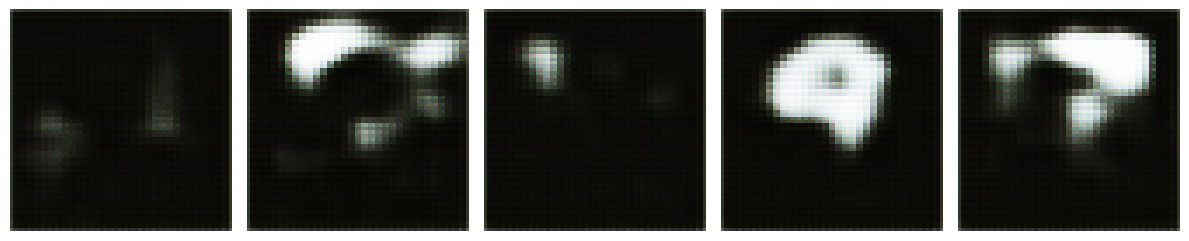

In [ ]:
generate_cvae2_images(model, attr_value=1, num_samples=5)

**TRES: VAE**

In [ ]:
class VAE(nn.Module):
    def __init__(self, image_size=64, latent_dim=200, z_dim=2, device='cuda'):
        super(VAE, self).__init__()

        self.device = device
        self.latent_dim = latent_dim
        self.z_dim = z_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten()
        )

        flat_dim = 64 * (image_size // 4) * (image_size // 4)
        self.fc = nn.Linear(flat_dim, latent_dim)
        self.mean_layer = nn.Linear(latent_dim, z_dim)
        self.logvar_layer = nn.Linear(latent_dim, z_dim)

        # Decoder
        self.decoder_input = nn.Linear(z_dim, latent_dim)
        self.decoder_fc = nn.Linear(latent_dim, flat_dim)
        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def encode(self, x):
        h = self.encoder(x)
        h = self.fc(h)
        mean = self.mean_layer(h)
        logvar = self.logvar_layer(h)
        return mean, logvar

    def reparameterization(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mean + eps * std
        return z

    def decode(self, z):
        z = self.decoder_input(z)
        z = self.decoder_fc(z)
        z = z.view(z.size(0), 64, 16, 16)
        return self.decoder_conv(z)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterization(mean, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mean, logvar

**Model Summary**

In [ ]:
# Crea datos ficticios para la imagen y los atributos
dummy_images = torch.randn(8, 3, 64, 64)  # [B, C, H, W]
dummy_attrs = torch.randn(8, 1)  # [B, attr_dim]

# Instancia el modelo
model = VAE(image_size=64, latent_dim=256, z_dim=2)

# Usa torchinfo.summary con input_data
summary(
    model,
    input_data=(dummy_images,),
)

Layer (type:depth-idx)                   Output Shape              Param #
VAE                                      [8, 3, 64, 64]            --
├─Sequential: 1-1                        [8, 16384]                --
│    └─Conv2d: 2-1                       [8, 32, 32, 32]           1,568
│    └─LeakyReLU: 2-2                    [8, 32, 32, 32]           --
│    └─Conv2d: 2-3                       [8, 64, 16, 16]           32,832
│    └─LeakyReLU: 2-4                    [8, 64, 16, 16]           --
│    └─Flatten: 2-5                      [8, 16384]                --
├─Linear: 1-2                            [8, 256]                  4,194,560
├─Linear: 1-3                            [8, 2]                    514
├─Linear: 1-4                            [8, 2]                    514
├─Linear: 1-5                            [8, 256]                  768
├─Linear: 1-6                            [8, 16384]                4,210,688
├─Sequential: 1-7                        [8, 3, 64, 64]      

**Train Model**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 1e-4
num_hidden = 512
z_dim = 15

epochs = 30

In [ ]:
model = VAE(image_size=64, latent_dim=num_hidden, z_dim=z_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_vae_model(model, dataloader, optimizer, epochs, device)

Epoch 1/30, Batch 0, Loss: 9335.4434
====> Epoch 1: Average loss = 6153.0428
Epoch 2/30, Batch 0, Loss: 2316.8372
====> Epoch 2: Average loss = 1775.8858
Epoch 3/30, Batch 0, Loss: 1119.1033
====> Epoch 3: Average loss = 1432.3021
Epoch 4/30, Batch 0, Loss: 1271.6680
====> Epoch 4: Average loss = 1298.5195
Epoch 5/30, Batch 0, Loss: 1307.5189
====> Epoch 5: Average loss = 1160.3689
Epoch 6/30, Batch 0, Loss: 1243.1260
====> Epoch 6: Average loss = 1052.2298
Epoch 7/30, Batch 0, Loss: 717.5206
====> Epoch 7: Average loss = 974.6318
Epoch 8/30, Batch 0, Loss: 1041.4070
====> Epoch 8: Average loss = 916.7623
Epoch 9/30, Batch 0, Loss: 750.7549
====> Epoch 9: Average loss = 859.5390
Epoch 10/30, Batch 0, Loss: 1247.4589
====> Epoch 10: Average loss = 826.7263
Epoch 11/30, Batch 0, Loss: 729.0603
====> Epoch 11: Average loss = 801.9209
Epoch 12/30, Batch 0, Loss: 784.0670
====> Epoch 12: Average loss = 781.0154
Epoch 13/30, Batch 0, Loss: 708.4957
====> Epoch 13: Average loss = 753.0114
Epo

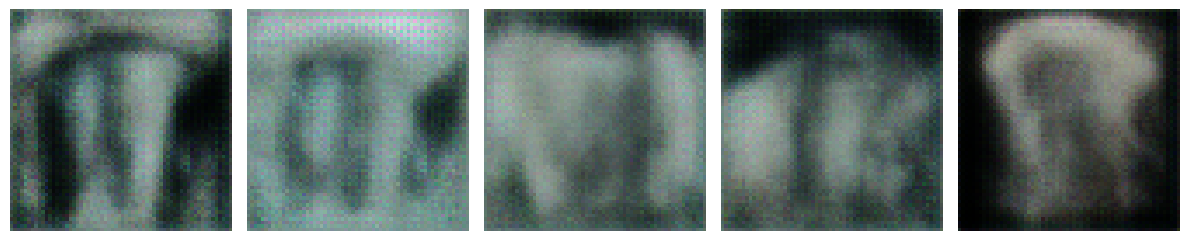

In [ ]:
generate_vae_images(model, num_samples=5)